In [1]:
# Parameters
input_path = "../data/resale-flat-prices.csv"
start_date = "2017-01-01"
end_date = "2021-01-01"
town = "QUEENSTOWN"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [3]:
display(Markdown(f'<h1>Resale Housing Price Analysis For <b>{town.title()}</b></h1><br> Start Date: {start_date}<br> End Date: {end_date}'))

<h1>Resale Housing Price Analysis For <b>Queenstown</b></h1><br> Start Date: 2017-01-01<br> End Date: 2021-01-01

In [4]:
df = pd.read_csv(input_path)
df['date'] = pd.to_datetime(df['month'], format = '%Y-%m')
df = df.loc[(df['town'] == town) & (df['date'].between(start_date, end_date))]

## Number of Sales Over Time

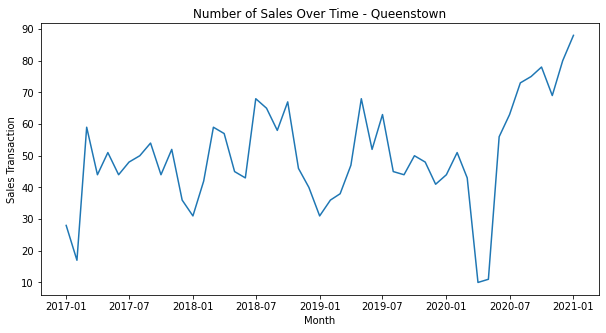

In [5]:
sales_over_time = df.groupby('date', as_index = False).agg({'resale_price':'count'}).rename(columns = {'resale_price':'resale_count'})
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.lineplot(data = sales_over_time, x = 'date', y = 'resale_count')
ax.set_xlabel('Month')
ax.set_ylabel('Sales Transaction')
ax.set_title(f'Number of Sales Over Time - {town.title()}')
plt.show()

## Price Over Time

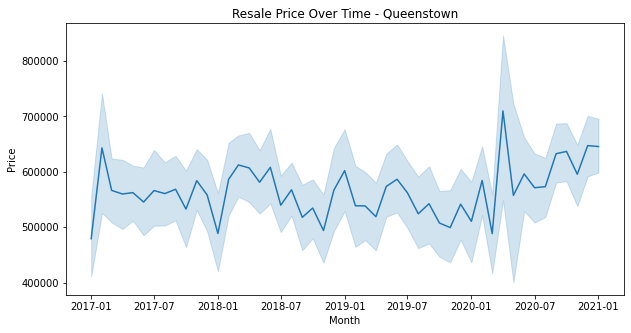

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.lineplot(data = df, x = 'date', y = 'resale_price')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title(f'Resale Price Over Time - {town.title()}')
plt.show()

## Price Distribution By Flat Type

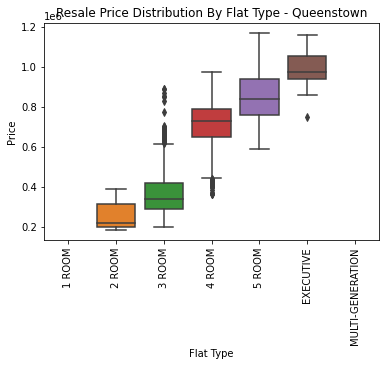

In [7]:
xaxis_order =['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
ax = sns.boxplot(data = df, x = 'flat_type', y = 'resale_price', order = xaxis_order)
ax.set_xlabel('Flat Type')
ax.set_ylabel('Price')
ax.set_title(f'Resale Price Distribution By Flat Type - {town.title()}')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()